In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [5]:
img1 = cv2.imread('/content/gdrive/My Drive/mon.jpg')
img2 = cv2.imread('/content/gdrive/My Drive/mon_.jpg')

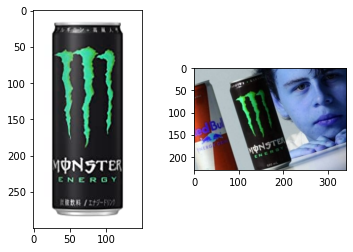

In [6]:
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)

In [7]:
# A-KAZE検出器の生成
akaze = cv2.AKAZE_create()  

In [8]:
# 特徴量の検出と特徴量ベクトルの計算
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

In [9]:
len(kp1)

185

In [10]:
img1_akaze=cv2.drawKeypoints(img1, kp1, None, flags=4)
img2_akaze=cv2.drawKeypoints(img2, kp2, None, flags=4)

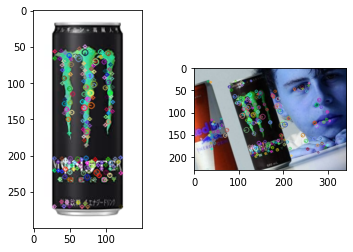

In [11]:
plt.subplot(121)
plt.imshow(img1_akaze)
plt.subplot(122)
plt.imshow(img2_akaze)

In [12]:
print(des1)

[[  0  29   2 ... 253 255  30]
 [ 96   9   3 ... 127 255  56]
 [ 56  86   6 ... 255  31  48]
 ...
 [ 10 246 135 ...   6   0  33]
 [ 56  31  22 ... 174  69  10]
 [225 233  79 ... 255 255   8]]


In [18]:
# Brute-Force Matcher生成
bf = cv2.BFMatcher()

In [19]:
# 特徴量ベクトル同士をBrute-Force＆KNNでマッチング
matches = bf.knnMatch(des1, des2, k=2)

In [20]:
print(len(matches))#点の数
print(len(matches[0]))#最上位の候補と次の候補

185
2


In [31]:
img_onepoint = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches[0:1], None, flags=2)
img_onepoint_ok = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches[72:73], None, flags=2)
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, flags=2)

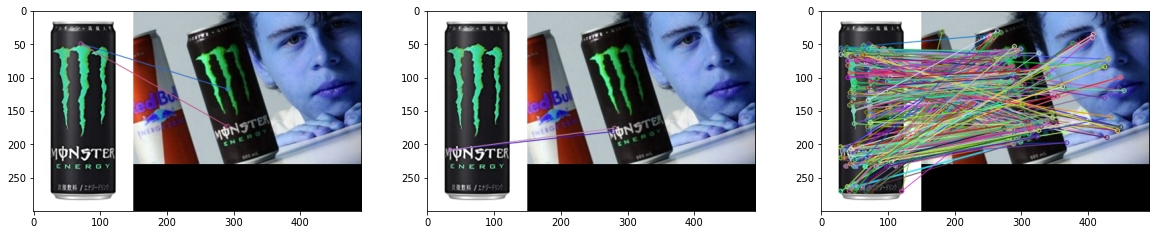

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(img_onepoint)#没候補
plt.subplot(132)
plt.imshow(img_onepoint_ok)#合格候補
plt.subplot(133)
plt.imshow(img3)

In [30]:
# データを間引きする
#最上位の候補と次の候補 距離が大きい物は確信度が低いため排除
ratio = 0.7　#許容範囲指定
good = []
i=0
for m, n in matches:
    if m.distance < ratio * n.distance:
        good.append([m])
        print(i)
    i+=1

print(len(good))

72
75
156
183
4


In [104]:
# 対応する特徴点同士を描画
img4 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good[:], None, flags=2)

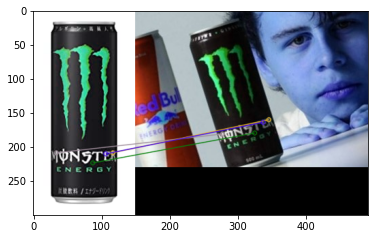

In [105]:
plt.imshow(img4)